Relative Compactness (X1),Surface Area (X2),Wall Area (X3),Roof Area (X4),Overall Height (X5),Orientation (X6),Glazing Area (X7),Glazing Area Distribution (X8),Heating Load (Y1),Cooling Load (Y2)
0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Dataset,Samples,Features
Training set,460,8
Validation set,154,8
Test set,154,8


Best alpha: 0.0001, Validation R²: 0.9050212036135086
Test R² score: 0.9196


Metric,Value
Test R² Score,0.9196
Intercept,75.6626
Coefficient (X1),-59.8421
Coefficient (X2),-0.0572
Coefficient (X3),0.0369
Coefficient (X4),-0.0470
Coefficient (X5),4.1622
Coefficient (X6),-0.0181
Coefficient (X7),20.1603
Coefficient (X8),0.2442


Feature,Coefficient
Relative Compactness (X1),-59.842073
Glazing Area (X7),20.160336
Overall Height (X5),4.162209
Glazing Area Distribution (X8),0.244157
Surface Area (X2),-0.057176


Metric,Score
Validation R²,0.898826
Test R²,0.907127


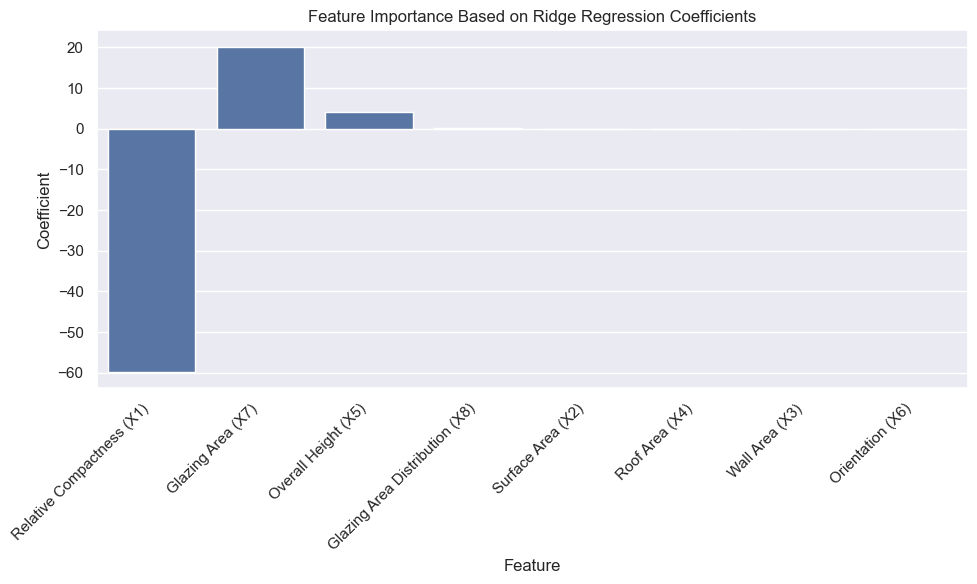

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns

# Set styles for plots and tables
sns.set()

# Reusable CSS styling for tables (centered tables)
table_css = """
    <style>
        table {
            width: 80%;
            margin: 25px auto;
            font-family: Arial, sans-serif;
            border-collapse: collapse;
            box-shadow: 0 0 10px rgba(0,0,0,0.1);
        }
        th {
            padding: 12px;
            text-align: center;
            background-color: #4CAF50;
            color: white;
        }
        td {
            padding: 12px;
            text-align: center;
            border-bottom: 1px solid #ddd;
        }
        tr:hover {background-color: #f1f1f1;}
    </style>
"""

# Load the dataset
data = pd.read_excel('ENB2012_data.xlsx')

# Rename columns for better visualization
data.columns = [
    "Relative Compactness (X1)", "Surface Area (X2)", "Wall Area (X3)", "Roof Area (X4)", 
    "Overall Height (X5)", "Orientation (X6)", "Glazing Area (X7)", "Glazing Area Distribution (X8)", 
    "Heating Load (Y1)", "Cooling Load (Y2)"
]

# Separate features and target variable
X = data.iloc[:, :8]  # Features (X1 to X8)
y = data["Heating Load (Y1)"]  # Target variable (Y1)

# Display the first few rows of the dataset
styled_data_table = f"{table_css}{data.head().to_html(index=False)}"
display(HTML(styled_data_table))

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display dataset split sizes
dataset_split = pd.DataFrame({
    'Dataset': ['Training set', 'Validation set', 'Test set'],
    'Samples': [X_train.shape[0], X_val.shape[0], X_test.shape[0]],
    'Features': [X_train.shape[1], X_val.shape[1], X_test.shape[1]]
})
styled_html_split_results = f"{table_css}{dataset_split.to_html(index=False)}"
display(HTML(styled_html_split_results))

# Train Ridge regression models with different alpha values
alphas = np.logspace(-4, 4, 10)
best_alpha = None
best_r2_val = -np.inf

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    r2_val = r2_score(y_val, y_val_pred)
    if r2_val > best_r2_val:
        best_r2_val = r2_val
        best_alpha = alpha
        best_model = model

print(f"Best alpha: {best_alpha}, Validation R²: {best_r2_val}")

# Test the best model
y_test_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"Test R² score: {r2_test:.4f}")

# Extract and display model coefficients and intercept
coefficients = best_model.coef_
intercept = best_model.intercept_

model_results = pd.DataFrame({
    'Metric': ['Test R² Score', 'Intercept'] + [f'Coefficient (X{i+1})' for i in range(len(coefficients))],
    'Value': [round(r2_test, 4), round(intercept, 4)] + [round(coef, 4) for coef in coefficients]
})
styled_html_model_results = f"{table_css}{model_results.to_html(index=False)}"
display(HTML(styled_html_model_results))

# Rank features by the absolute value of their coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Extract the top 5 features
top_5_features = feature_importance.head(5)
styled_html = f"{table_css}{top_5_features.to_html(index=False)}"
display(HTML(styled_html))

# Train with only the top 5 features
top_5_X_train = X_train[top_5_features['Feature']]
top_5_X_val = X_val[top_5_features['Feature']]
top_5_X_test = X_test[top_5_features['Feature']]

top_5_model = Ridge(alpha=best_alpha)
top_5_model.fit(top_5_X_train, y_train)

# Evaluate the model with top 5 features
y_val_pred_top5 = top_5_model.predict(top_5_X_val)
r2_val_top5 = r2_score(y_val, y_val_pred_top5)

y_test_pred_top5 = top_5_model.predict(top_5_X_test)
r2_test_top5 = r2_score(y_test, y_test_pred_top5)

# Display results for top 5 features
results = pd.DataFrame({
    'Metric': ['Validation R²', 'Test R²'],
    'Score': [r2_val_top5, r2_test_top5]
})
styled_html_results = f"{table_css}{results.to_html(index=False)}"
display(HTML(styled_html_results))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Coefficient', data=feature_importance)
plt.title('Feature Importance Based on Ridge Regression Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:
!pip install numpy pandas scikit-learn matplotlib seaborn

In [7]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.
